In [723]:
#Functions, Parameters and Libraries

from random import random, seed
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys
import os
 
%matplotlib inline

#Defining polynomial function
def Func(x_func):
    term1 = a
    term2 = b*x_func
    term3 = c*(x_func**2)
    return term1 + term2 + term3 

def learning_schedule(t):
    t0, t1 = 5, 50
    return t0/(t+t1)

#Defining function for net difference
def diff_net(beta):
    net = np.sqrt(np.sum((beta[0])**2 + (beta[1])**2))
    return net

#Function for linear regression beta inversion with ridge parameter
def OLS(X, lamb):
    #lambda = 0 gives OLS
    beta_linreg = np.linalg.pinv(X.T @ X + lamb * np.eye(X.shape[1])) @ X.T @ y_func
    ypredict = xbnew.dot(beta_linreg)
    return beta_linreg, ypredict

#Defining standard gradient descent
def GD(M, eta, lamb, linreg_ridge):
    #Guess for unkown parameters beta
    beta = np.random.randn(2,1)
    beta[0] = rng.normal()
    beta[1] = rng.normal()
    #Number of minibatches
    m = int(n/M)
    for i in range(m):
        #Calculating the gradient and beta for each iteration
        gradient = (2.0/n)*X.T @ (X @ beta-y_func)+2*lamb*beta
        beta -= eta*gradient
    #Calculate the best fit line
    ypredict = xbnew.dot(beta)
    beta_diff = beta-linreg_ridge[0]
    print(f"GD Betas: eta = {eta}, lambda = {lamb}, batch size = {M}\n{beta} ")
    print(f"Beta difference: \n{beta_diff}\nNet diff: {diff_net(beta_diff)}")
    return ypredict

#Defining gradient descent with momentum       
def GD_momentum(M, eta, momentum, lamb, linreg_ridge):
    beta = np.random.randn(2,1)
    beta[0] = rng.normal()
    beta[1] = rng.normal()
    #Number of minibatches
    m = int(n/M)
    #Defining the intial change for momentum
    change = 0.0
    for i in range(m):
        gradient = (2.0/n)*X.T @ (X @ beta-y_func)+2*lamb*beta
        #Calculate the update 
        #Momentum can be changed to 0 to give standard GD
        new_change = eta * gradient + momentum * change
        beta -= new_change
        change = new_change
    ypredict = xbnew.dot(beta)
    beta_diff = beta-linreg_ridge[0]
    print(f"GD Betas: eta = {eta}, lambda = {lamb}, momentum = {momentum}, batch size = {M}\n{beta} ")
    print(f"Beta difference: \n{beta_diff}\nNet diff: {diff_net(beta_diff)}")
    return ypredict

#Defining stochastic gradient descent
def SGD(momentum, lamb, n_epochs, M, linreg_ridge):
    beta = np.random.randn(2,1)
    beta[0] = rng.normal()
    beta[1] = rng.normal()
    #Number of minibatches
    m = int(n/M)
    #Learning schedule is defined for learning rate decay
    change = 0.0
    #Loops through the number of epochs
    for epoch in range(n_epochs):
        #Dividing up into batches
        for i in range(m):
            #Choosing random values for the SGD
            random_index = M*rng.integers(m)
            xi = X[random_index:random_index+M]
            yi = y_func[random_index:random_index+M]
            gradient= (2.0/M)* xi.T @ ((xi @ beta)-yi)+2*lamb*beta
            #Updating learning rate to decay
            eta = learning_schedule(epoch*m+i)
            new_change = eta * gradient + momentum * change
            beta -= new_change
            change = new_change
    ypredict = xbnew.dot(beta)
    beta_diff = beta-linreg_ridge[0]
    print(f"SGD Betas: eta = {eta}, lambda = {lamb}, momentum = {momentum}, epochs = {n_epochs}, batch size = {M}\n{beta}")
    print(f"Beta difference: \n{beta_diff}\nNet diff: {diff_net(beta_diff)}")
    return ypredict

#Defining AdaGrad optimizer               
def AdaGD(lamb, n_epochs, M, linreg_ridge):
    beta = np.random.randn(2,1)
    beta[0] = rng.normal()
    beta[1] = rng.normal()
    #Number of minibatches
    m = int(n/M)
    #Learning schedule is defined for learning rate decay
    #Small delta parameter to ensure no division by 0
    delta = 1e-8
    for epoch in range(n_epochs):
        #The outer product is calculated newly for each epoch
        Giter = np.zeros(shape=(2,2))
        for i in range(m):
            gradient= (2.0/M)* X.T @ ((X @ beta)-y_func)+2*lamb*beta
            #Updating learning rate to decay
            eta = learning_schedule(epoch*m+i)
            #Calculate the outer products of the gradients and accumulating
            Giter += (gradient @ gradient.T) 
            #Taking diagonal and inverting
            Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Giter)))]
            #Hadamard product
            update = np.multiply(Ginverse,gradient) 
            beta -= update
    ypredict = xbnew.dot(beta)
    beta_diff = beta-linreg_ridge[0]
    print(f"AdaGrad GD Betas: eta = {eta}, lambda = {lamb}, epochs = {n_epochs}, batch size = {M}\n{beta}")
    print(f"Beta difference: \n{beta_diff}\nNet diff: {diff_net(beta_diff)}")
    return ypredict

#Defining AdaGrad optimizer with stochastic GD 
def AdaSGD(lamb, n_epochs, M, linreg_ridge):
    beta = np.random.randn(2,1)
    beta[0] = rng.normal()
    beta[1] = rng.normal()
    #Number of minibatches
    m = int(n/M)
    delta = 1e-8
    for epoch in range(n_epochs):
        Giter = np.zeros(shape=(2,2))
        for i in range(m):
            random_index = M*rng.integers(m)
            xi = X[random_index:random_index+M]
            yi = y_func[random_index:random_index+M]
            gradient= (2.0/M)* xi.T @ ((xi @ beta)-yi)+2*lamb*beta
            eta = learning_schedule(epoch*m+i)
            Giter += (gradient @ gradient.T) 
            Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Giter)))]
            update = np.multiply(Ginverse,gradient)
            beta -= update
    ypredict = xbnew.dot(beta)
    beta_diff = beta-linreg_ridge[0]
    print(f"AdaGrad SGD Betas: eta = {eta}, lambda = {lamb}, epochs = {n_epochs}, batch size = {M}\n{beta}")
    print(f"Beta difference: \n{beta_diff}\nNet diff: {diff_net(beta_diff)}")
    return ypredict

#Defining RMSprop optimizer
def rmsprop(lamb, n_epochs, M, rho1, linreg_ridge):
    beta = np.random.randn(2,1)
    beta[0] = rng.normal()
    beta[1] = rng.normal()
    #Number of minibatches
    m = int(n/M)
    delta = 1e-8
    for epoch in range(n_epochs):
        Giter = np.zeros(shape=(2,2))
        for i in range(m):
            random_index = M*rng.integers(m)
            xi = X[random_index:random_index+M]
            yi = y_func[random_index:random_index+M]
            gradient= (2.0/M)* xi.T @ ((xi @ beta)-yi)+2*lamb*beta
            eta = learning_schedule(epoch*m+i)
            #Previous value for the outer products of the gradient
            Previous = Giter
            Giter += (gradient @ gradient.T) 
            #Scaling the results with rho1
            Gnew = (rho1*Previous+(1-rho1)*Giter)
            Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Gnew)))]
            update = np.multiply(Ginverse,gradient)
            beta -= update
    ypredict = xbnew.dot(beta)
    beta_diff = beta-linreg_ridge[0]
    print(f"RMSprop Betas: eta = {eta}, lambda = {lamb}, epochs = {n_epochs}, batch size = {M}\n{beta}")
    print(f"Beta difference: \n{beta_diff}\nNet diff: {diff_net(beta_diff)}")
    return ypredict

#Defining ADAM optimizer
def ADAM(lamb, n_epochs, M, rho1, rho2, linreg_ridge):
    beta = np.random.randn(2,1)
    beta[0] = rng.normal()
    beta[1] = rng.normal()
    #Number of minibatches
    m = int(n/M)
    delta = 1e-8
    for epoch in range(n_epochs):
        #Defining initial moments
        m_t = 0 
        v_t = 0 
        t = 0
        for i in range(m):
            random_index = M*rng.integers(m)
            xi = X[random_index:random_index+M]
            yi = y_func[random_index:random_index+M]
            gradient= (2.0/M)* xi.T @ ((xi @ beta)-yi)+2*lamb*beta
            eta = learning_schedule(epoch*m+i)
            #Increment
            t+=1
            #First moment is updated with the hyperparameter rho1
            m_t = rho1*m_t + (1-rho1)*gradient	
            #Second moment is updated with the hyperparameter rho2 and squared gradient
            v_t = rho2*v_t + (1-rho2)*gradient**2
            #First and second moments are bias corrected
            m_cap = m_t/(1-(rho1**t))		
            v_cap = v_t/(1-(rho2**t))							
            beta = beta - (eta*m_cap)/(np.sqrt(v_cap)+delta)
    ypredict = xbnew.dot(beta)
    beta_diff = beta-linreg_ridge[0]
    print(f"ADAM Betas: eta = {eta}, lambda = {lamb}, epochs = {n_epochs}, batch size = {M}\n{beta}")
    print(f"Beta difference: \n{beta_diff}\nNet diff: {diff_net(beta_diff)}")
    return ypredict

#Seed
seed = 3754
#seed = np.random.integers(0, 5000)
#print(seed)

#Number of data points
n = 1000

#Defining data for plotting
xnew = np.array([[0],[2]])
xbnew = np.c_[np.ones((2,1)), xnew]


#RNG
rng = np.random.default_rng(seed=seed)

#Defining paramters

#Learning Rate
eta = [1.0, 0.1, 0.01, 0.001]
#Ridge parameter for regularization
lamb = [1.0, 0.1, 0.01, 0.001]
#Momentum
momentum = [0.1, 0.3, 0.5, 1.0]
#Number of epochs
n_epochs = [1, 250, 500, 1000]


#Coefficients for polynomial function
a = rng.uniform(0, 10, (n, 1))[0]
b = rng.uniform(0, 1, (n, 1))[0]
c = rng.uniform(0, 1, (n, 1))[0]

#Noise
noise = 0.2

#Generating data for x and y function
x_func = 2*rng.uniform(0, 1, (n, 1))
y_func = Func(x_func)
#Adding nosie to the data
y_func = y_func + noise*rng.normal(0, 1, y_func.shape)

#Creating the design matrix
X = np.c_[np.ones((n,1)), x_func]
XT_X = X.T @ X

#Determining the eigen values using Hessian matrix
for i in range(len(lamb)):
    H = (2.0/n)* X.T @ X+2*lamb[i]* np.eye(XT_X.shape[0])
    #Get the eigenvalues
    EigValues, EigVectors = np.linalg.eig(H)
    print(f"Eigenvalues of Hessian Matrix:{EigValues}, lambda={lamb[i]}")

#Size of each minibatch
M= [1, 25, 50, 100]

#Exponential decay rate for first moments
rho1 = 0.8
#Exponential decay rate for second moments
rho2 = 0.99

Eigenvalues of Hessian Matrix:[2.32392657 6.26724039], lambda=1.0
Eigenvalues of Hessian Matrix:[0.52392657 4.46724039], lambda=0.1
Eigenvalues of Hessian Matrix:[0.34392657 4.28724039], lambda=0.01
Eigenvalues of Hessian Matrix:[0.32592657 4.26924039], lambda=0.001


Ridge Betas: lambda=1.0
[[3.76396226]
 [1.77143504]]
Ridge Betas: lambda=0.1
[[3.7721615 ]
 [1.76649757]]
Ridge Betas: lambda=0.01
[[3.77298584]
 [1.76600012]]
Ridge Betas: lambda=0.001
[[3.77306832]
 [1.76595034]]
GD Betas: eta = 0.1, lambda = 1.0, batch size = 50
[[1.87196106]
 [1.80172356]] 
Beta difference: 
[[-1.90110727]
 [ 0.03577322]]
Net diff: 1.9014438087125118
GD Betas: eta = 0.1, lambda = 0.1, batch size = 50
[[3.15538582]
 [2.07269322]] 
Beta difference: 
[[-0.61768251]
 [ 0.30674289]]
Net diff: 0.6896541725281272
GD Betas: eta = 0.1, lambda = 0.01, batch size = 50
[[2.83607909]
 [2.54816638]] 
Beta difference: 
[[-0.93698923]
 [ 0.78221604]]
Net diff: 1.220578041030079
GD Betas: eta = 0.1, lambda = 0.001, batch size = 50
[[3.04266523]
 [2.39153084]] 
Beta difference: 
[[-0.73040309]
 [ 0.62558051]]
Net diff: 0.9616858387800302


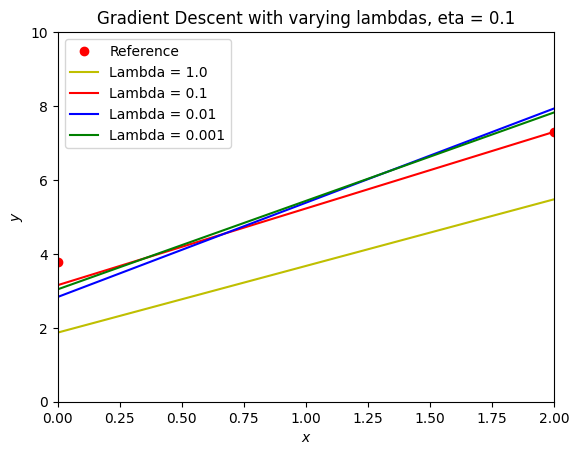

GD Betas: eta = 1.0, lambda = 0.001, batch size = 50
[[-5.15233719e+10]
 [-5.99247929e+10]] 
Beta difference: 
[[-5.15233719e+10]
 [-5.99247929e+10]]
Net diff: 79029353154.94814
GD Betas: eta = 0.1, lambda = 0.001, batch size = 50
[[3.59466084]
 [1.91693246]] 
Beta difference: 
[[-0.17840748]
 [ 0.15098213]]
Net diff: 0.23371955782039797
GD Betas: eta = 0.01, lambda = 0.001, batch size = 50
[[1.13173198]
 [1.21670757]] 
Beta difference: 
[[-2.64133634]
 [-0.54924277]]
Net diff: 2.697837150894027
GD Betas: eta = 0.001, lambda = 0.001, batch size = 50
[[-0.53290828]
 [ 0.09332169]] 
Beta difference: 
[[-4.3059766 ]
 [-1.67262864]]
Net diff: 4.619428651157479


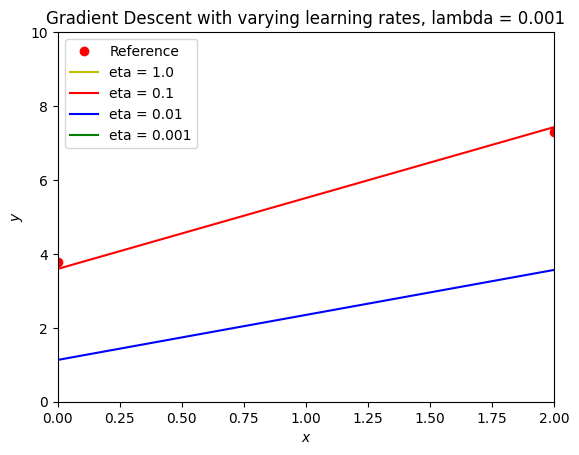

GD Betas: eta = 0.1, lambda = 0.001, batch size = 1
[[3.76396226]
 [1.77143504]] 
Beta difference: 
[[-0.00910606]
 [ 0.00548471]]
Net diff: 0.010630257319739399
GD Betas: eta = 0.1, lambda = 0.001, batch size = 25
[[3.2780965]
 [2.1891827]] 
Beta difference: 
[[-0.49497182]
 [ 0.42323237]]
Net diff: 0.6512470684674626
GD Betas: eta = 0.1, lambda = 0.001, batch size = 50
[[2.96460949]
 [2.45864779]] 
Beta difference: 
[[-0.80845883]
 [ 0.69269746]]
Net diff: 1.064629250581317
GD Betas: eta = 0.1, lambda = 0.001, batch size = 100
[[1.98822858]
 [3.27779933]] 
Beta difference: 
[[-1.78483974]
 [ 1.511849  ]]
Net diff: 2.3390896296623986


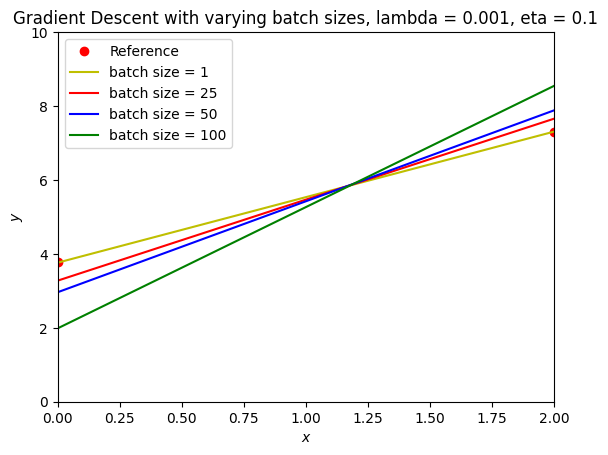

In [724]:
#Part 1, GD 

#Print the reference beta inversion with different ridge parameter values
for i in range(len(lamb)):
    linreg_ridge = OLS(X, lamb[i])
    print(f"Ridge Betas: lambda={lamb[i]}\n{linreg_ridge[0]}")

#Calculating GD with different parameters
gd_1 = GD(M[2], eta[1], lamb[0], linreg_ridge)
gd_2 = GD(M[2], eta[1], lamb[1], linreg_ridge)
gd_3 = GD(M[2], eta[1], lamb[2], linreg_ridge)
gd_4 = GD(M[2], eta[1], lamb[3], linreg_ridge)

plt.figure(1)
plt.title(f"Gradient Descent with varying lambdas, eta = {eta[1]}")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.axis([0,2.0,0, 10.0])
plt.plot(xnew, linreg_ridge[1], 'ro', label=f"Reference")
plt.plot(xnew, gd_1, "y", label= f"Lambda = {lamb[0]}")
plt.plot(xnew, gd_2, "r", label= f"Lambda = {lamb[1]}")
plt.plot(xnew, gd_3, 'b',label= f"Lambda = {lamb[2]}")
plt.plot(xnew, gd_4, "g", label= f"Lambda = {lamb[3]}")
plt.legend()
plt.savefig('part1_GD_lambdas', dpi=300)
plt.show()

#Calculating GD with different parameters
gd_1 = GD(M[2], eta[0], lamb[3], linreg_ridge)
gd_2 = GD(M[2], eta[1], lamb[3], linreg_ridge)
gd_3 = GD(M[2], eta[2], lamb[3], linreg_ridge)
gd_4 = GD(M[2], eta[3], lamb[3], linreg_ridge)

plt.figure(2)
plt.title(f"Gradient Descent with varying learning rates, lambda = {lamb[3]}")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.axis([0,2.0,0, 10.0])
plt.plot(xnew, linreg_ridge[1], 'ro', label=f"Reference")
plt.plot(xnew, gd_1, "y", label= f"eta = {eta[0]}")
plt.plot(xnew, gd_2, "r", label= f"eta = {eta[1]}")
plt.plot(xnew, gd_3, 'b',label= f"eta = {eta[2]}")
plt.plot(xnew, gd_4, "g", label= f"eta = {eta[3]}")
plt.legend()
plt.savefig('part1_GD_etas', dpi=300)
plt.show()

#Calculating GD with different batch sizes
gd_1 = GD(M[0], eta[1], lamb[3], linreg_ridge)
gd_2 = GD(M[1], eta[1], lamb[3], linreg_ridge)
gd_3 = GD(M[2], eta[1], lamb[3], linreg_ridge)
gd_4 = GD(M[3], eta[1], lamb[3], linreg_ridge)

plt.figure(3)
plt.title(f"Gradient Descent with varying batch sizes, lambda = {lamb[3]}, eta = {eta[1]}")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.axis([0,2.0,0, 10.0])
plt.plot(xnew, linreg_ridge[1], 'ro', label=f"Reference")
plt.plot(xnew, gd_1, "y", label= f"batch size = {M[0]}")
plt.plot(xnew, gd_2, "r", label= f"batch size = {M[1]}")
plt.plot(xnew, gd_3, 'b',label= f"batch size = {M[2]}")
plt.plot(xnew, gd_4, "g", label= f"batch size = {M[3]}")
plt.legend()
plt.savefig('part1_GD_batches', dpi=300)
plt.show()

Ridge Betas: lambda=0.001
[[3.77306832]
 [1.76595034]]
GD Betas: eta = 0.1, lambda = 0.001, momentum = 0.1, batch size = 50
[[3.92884595]
 [1.62966705]] 
Beta difference: 
[[ 0.15577763]
 [-0.13628328]]
Net diff: 0.2069777819037395
GD Betas: eta = 0.1, lambda = 0.001, momentum = 0.3, batch size = 50
[[3.31019898]
 [2.16154767]] 
Beta difference: 
[[-0.46286934]
 [ 0.39559734]]
Net diff: 0.6088885638868463
GD Betas: eta = 0.1, lambda = 0.001, momentum = 0.5, batch size = 50
[[3.34196311]
 [2.13415647]] 
Beta difference: 
[[-0.43110521]
 [ 0.36820613]]
Net diff: 0.5669457295404258
GD Betas: eta = 0.1, lambda = 0.001, momentum = 1.0, batch size = 50
[[ 3.8539312 ]
 [-0.51086938]] 
Beta difference: 
[[ 0.08086288]
 [-2.27681971]]
Net diff: 2.2782552133835927


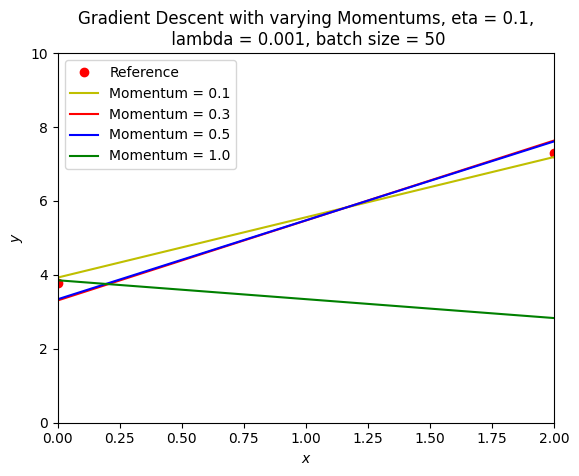

GD Betas: eta = 1.0, lambda = 0.001, momentum = 0.5, batch size = 50
[[-7.03145043e+08]
 [-8.17800148e+08]] 
Beta difference: 
[[-7.03145046e+08]
 [-8.17800149e+08]]
Net diff: 1078522155.8366394
GD Betas: eta = 0.1, lambda = 0.001, momentum = 0.5, batch size = 50
[[3.53390213]
 [1.96906375]] 
Beta difference: 
[[-0.23916619]
 [ 0.20311341]]
Net diff: 0.31377623419557443
GD Betas: eta = 0.01, lambda = 0.001, momentum = 0.5, batch size = 50
[[2.84108984]
 [1.71238811]] 
Beta difference: 
[[-0.93197848]
 [-0.05356223]]
Net diff: 0.9335163617810381
GD Betas: eta = 0.001, lambda = 0.001, momentum = 0.5, batch size = 50
[[ 1.15164188]
 [-0.65375301]] 
Beta difference: 
[[-2.62142645]
 [-2.41970335]]
Net diff: 3.567469818331391


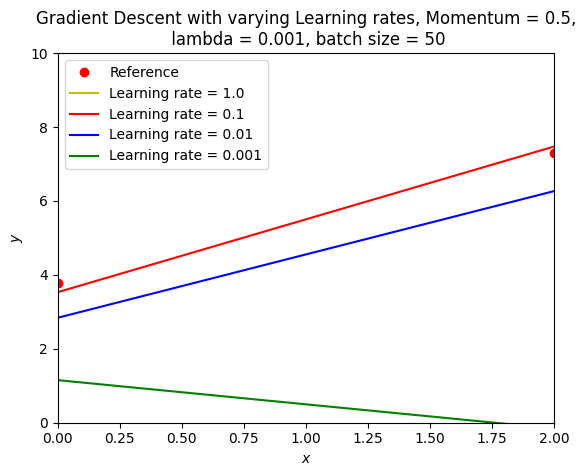

GD Betas: eta = 0.1, lambda = 0.001, momentum = 0.5, batch size = 1
[[3.76396226]
 [1.77143504]] 
Beta difference: 
[[-0.00910606]
 [ 0.00548471]]
Net diff: 0.010630257319735362
GD Betas: eta = 0.1, lambda = 0.001, momentum = 0.5, batch size = 25
[[3.69660589]
 [1.82935386]] 
Beta difference: 
[[-0.07646244]
 [ 0.06340353]]
Net diff: 0.0993303143933942
GD Betas: eta = 0.1, lambda = 0.001, momentum = 0.5, batch size = 50
[[3.56446245]
 [1.94287122]] 
Beta difference: 
[[-0.20860588]
 [ 0.17692089]]
Net diff: 0.2735277148776852
GD Betas: eta = 0.1, lambda = 0.001, momentum = 0.5, batch size = 100
[[2.86304805]
 [2.35601546]] 
Beta difference: 
[[-0.91002027]
 [ 0.59006513]]
Net diff: 1.0845799859236844


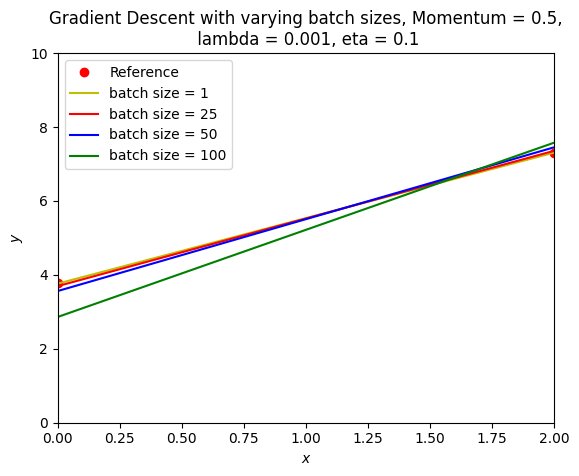

GD Betas: eta = 0.0724, lambda = 0.001, momentum = 0.5, batch size = 50
[[3.34531868]
 [2.13049081]] 
Beta difference: 
[[-0.42774964]
 [ 0.36454047]]
Net diff: 0.5620138023570379


In [725]:
#Part 2, Momentum

#Print the reference beta inversion with lambda = 0.001
linreg_ridge = OLS(X, lamb[3])
print(f"Ridge Betas: lambda={lamb[3]}\n{linreg_ridge[0]}")

#Calculating GD with momentum with different momentums
gd_1 = GD_momentum(M[2], eta[1], momentum[0], lamb[3], linreg_ridge)
gd_2 = GD_momentum(M[2], eta[1], momentum[1], lamb[3], linreg_ridge)
gd_3 = GD_momentum(M[2], eta[1], momentum[2], lamb[3], linreg_ridge)
gd_4 = GD_momentum(M[2], eta[1], momentum[3], lamb[3], linreg_ridge)

plt.figure(1)
plt.title(f"Gradient Descent with varying Momentums, eta = {eta[1]},\n lambda = {lamb[3]}, batch size = {M[2]}")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.axis([0,2.0,0, 10.0])
plt.plot(xnew, linreg_ridge[1], 'ro', label=f"Reference")
plt.plot(xnew, gd_1, "y", label= f"Momentum = {momentum[0]}")
plt.plot(xnew, gd_2, "r", label= f"Momentum = {momentum[1]}")
plt.plot(xnew, gd_3, 'b',label= f"Momentum = {momentum[2]}")
plt.plot(xnew, gd_4, "g", label= f"Momentum = {momentum[3]}")
plt.legend()
plt.savefig('part2_GD_momentums', dpi=300)
plt.show()

#Calculating GD with momentum with learning rates
gd_1 = GD_momentum(M[2], eta[0], momentum[2], lamb[3], linreg_ridge)
gd_2 = GD_momentum(M[2], eta[1], momentum[2], lamb[3], linreg_ridge)
gd_3 = GD_momentum(M[2], eta[2], momentum[2], lamb[3], linreg_ridge)
gd_4 = GD_momentum(M[2], eta[3], momentum[2], lamb[3], linreg_ridge)

plt.figure(2)
plt.title(f"Gradient Descent with varying Learning rates, Momentum = {momentum[2]},\n lambda = {lamb[3]}, batch size = {M[2]}")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.axis([0,2.0,0, 10.0])
plt.plot(xnew, linreg_ridge[1], 'ro', label=f"Reference")
plt.plot(xnew, gd_1, "y", label= f"Learning rate = {eta[0]}")
plt.plot(xnew, gd_2, "r", label= f"Learning rate = {eta[1]}")
plt.plot(xnew, gd_3, 'b',label= f"Learning rate = {eta[2]}")
plt.plot(xnew, gd_4, "g", label= f"Learning rate = {eta[3]}")
plt.legend()
plt.savefig('part2_GD_etas', dpi=300)
plt.show()

#Calculating GD with momentum with batch sizes
gd_1 = GD_momentum(M[0], eta[1], momentum[2], lamb[3], linreg_ridge)
gd_2 = GD_momentum(M[1], eta[1], momentum[2], lamb[3], linreg_ridge)
gd_3 = GD_momentum(M[2], eta[1], momentum[2], lamb[3], linreg_ridge)
gd_4 = GD_momentum(M[3], eta[1], momentum[2], lamb[3], linreg_ridge)

plt.figure(3)
plt.title(f"Gradient Descent with varying batch sizes, Momentum = {momentum[2]},\n lambda = {lamb[3]}, eta = {eta[1]}")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.axis([0,2.0,0, 10.0])
plt.plot(xnew, linreg_ridge[1], 'ro', label=f"Reference")
plt.plot(xnew, gd_1, "y", label= f"batch size = {M[0]}")
plt.plot(xnew, gd_2, "r", label= f"batch size = {M[1]}")
plt.plot(xnew, gd_3, 'b',label= f"batch size = {M[2]}")
plt.plot(xnew, gd_4, "g", label= f"batch size = {M[3]}")
plt.legend()
plt.savefig('part2_GD_batches', dpi=300)
plt.show()

eta_t = 0.0724
gd_t = GD_momentum(M[2], eta_t, momentum[2], lamb[3], linreg_ridge)

Ridge Betas: lambda=0.001
[[3.77306832]
 [1.76595034]]
SGD Betas: eta = 0.07246376811594203, lambda = 0.001, momentum = 0.5, epochs = 1, batch size = 50
[[3.6202665 ]
 [1.88488791]]
Beta difference: 
[[-0.15280182]
 [ 0.11893757]]
Net diff: 0.19363507724254125
SGD Betas: eta = 0.0009902951079421667, lambda = 0.001, momentum = 0.5, epochs = 250, batch size = 50
[[3.76637176]
 [1.77026927]]
Beta difference: 
[[-0.00669657]
 [ 0.00431894]]
Net diff: 0.007968512991286982
SGD Betas: eta = 0.0004975619464623346, lambda = 0.001, momentum = 0.5, epochs = 500, batch size = 50
[[3.76199771]
 [1.77004408]]
Beta difference: 
[[-0.01107061]
 [ 0.00409375]]
Net diff: 0.011803270972176585
SGD Betas: eta = 0.0002493889969574542, lambda = 0.001, momentum = 0.5, epochs = 1000, batch size = 50
[[3.76308857]
 [1.77193699]]
Beta difference: 
[[-0.00997975]
 [ 0.00598665]]
Net diff: 0.011637675610298976


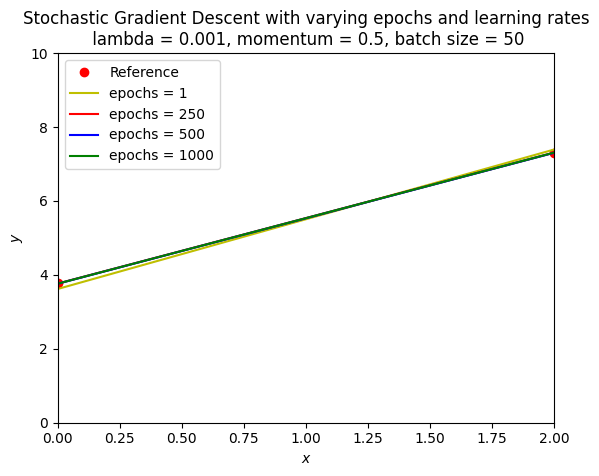

SGD Betas: eta = 0.0009902951079421667, lambda = 0.001, momentum = 0.1, epochs = 250, batch size = 50
[[3.76186274]
 [1.77295759]]
Beta difference: 
[[-0.01120558]
 [ 0.00700726]]
Net diff: 0.013216154696870552
SGD Betas: eta = 0.0009902951079421667, lambda = 0.001, momentum = 0.3, epochs = 250, batch size = 50
[[3.76246429]
 [1.76814833]]
Beta difference: 
[[-0.01060403]
 [ 0.00219799]]
Net diff: 0.010829431460186327
SGD Betas: eta = 0.0009902951079421667, lambda = 0.001, momentum = 0.5, epochs = 250, batch size = 50
[[3.7646816 ]
 [1.76896233]]
Beta difference: 
[[-0.00838673]
 [ 0.00301199]]
Net diff: 0.008911187768511547
SGD Betas: eta = 0.0009902951079421667, lambda = 0.001, momentum = 1.0, epochs = 250, batch size = 50
[[15.31781137]
 [ 8.17690072]]
Beta difference: 
[[11.54474305]
 [ 6.41095038]]
Net diff: 13.205354101092446


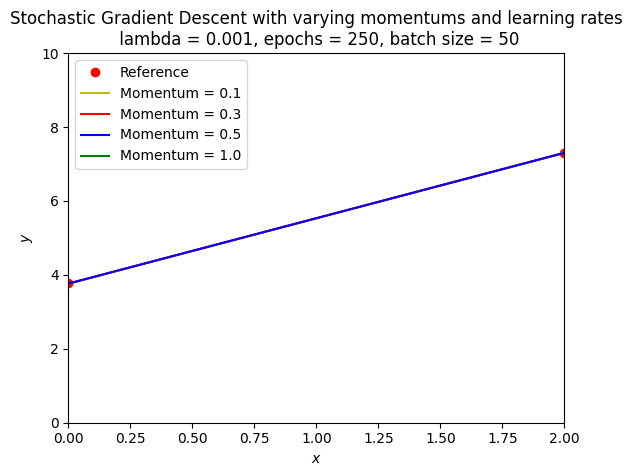

SGD Betas: eta = 1.999608076816944e-05, lambda = 0.001, momentum = 0.5, epochs = 250, batch size = 1
[[3.76662737]
 [1.76713323]]
Beta difference: 
[[-0.00644095]
 [ 0.00118289]]
Net diff: 0.006548673477446875
SGD Betas: eta = 0.0004975619464623346, lambda = 0.001, momentum = 0.5, epochs = 250, batch size = 25
[[3.76344586]
 [1.77176256]]
Beta difference: 
[[-0.00962246]
 [ 0.00581223]]
Net diff: 0.011241606695129695
SGD Betas: eta = 0.0009902951079421667, lambda = 0.001, momentum = 0.5, epochs = 250, batch size = 50
[[3.76305743]
 [1.77763959]]
Beta difference: 
[[-0.01001089]
 [ 0.01168925]]
Net diff: 0.015390144541644377
SGD Betas: eta = 0.001961553550411926, lambda = 0.001, momentum = 0.5, epochs = 250, batch size = 100
[[3.763524  ]
 [1.77162656]]
Beta difference: 
[[-0.00954433]
 [ 0.00567622]]
Net diff: 0.011104666757163916


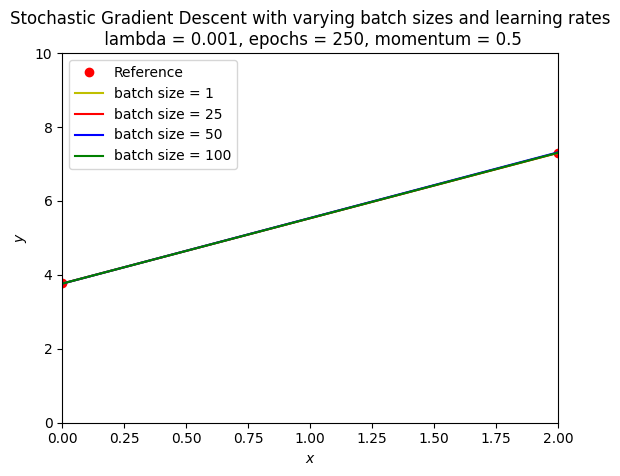

In [726]:
#Part 3, SGD

linreg_ridge = OLS(X, lamb[3])
print(f"Ridge Betas: lambda={lamb[3]}\n{linreg_ridge[0]}")


#Calculating SGD with different epochs
sgd_1 = SGD(momentum[2], lamb[3], n_epochs[0], M[2], linreg_ridge)
sgd_2 = SGD(momentum[2], lamb[3], n_epochs[1], M[2], linreg_ridge)
sgd_3 = SGD(momentum[2], lamb[3], n_epochs[2], M[2], linreg_ridge)
sgd_4 = SGD(momentum[2], lamb[3], n_epochs[3], M[2], linreg_ridge)

plt.figure(1)
plt.title(f"Stochastic Gradient Descent with varying epochs and learning rates\n lambda = {lamb[3]}, momentum = {momentum[2]}, batch size = {M[2]}")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.axis([0,2.0,0, 10.0])
plt.plot(xnew, linreg_ridge[1], 'ro', label=f"Reference")
plt.plot(xnew, sgd_1, "y", label= f"epochs = {n_epochs[0]}")
plt.plot(xnew, sgd_2, "r", label= f"epochs = {n_epochs[1]}")
plt.plot(xnew, sgd_3, 'b',label= f"epochs = {n_epochs[2]}")
plt.plot(xnew, sgd_4, "g", label= f"epochs = {n_epochs[3]}")
plt.legend()
plt.savefig('part3_SGD_epochs', dpi=300)
plt.show()

#Calculating SGD with different momentums
sgd_1 = SGD(momentum[0], lamb[3], n_epochs[1], M[2], linreg_ridge)
sgd_2 = SGD(momentum[1], lamb[3], n_epochs[1], M[2], linreg_ridge)
sgd_3 = SGD(momentum[2], lamb[3], n_epochs[1], M[2], linreg_ridge)
sgd_4 = SGD(momentum[3], lamb[3], n_epochs[1], M[2], linreg_ridge)

plt.figure(2)
plt.title(f"Stochastic Gradient Descent with varying momentums and learning rates\n lambda = {lamb[3]}, epochs = {n_epochs[1]}, batch size = {M[2]}")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.axis([0,2.0,0, 10.0])
plt.plot(xnew, linreg_ridge[1], 'ro', label=f"Reference")
plt.plot(xnew, sgd_1, "y", label= f"Momentum = {momentum[0]}")
plt.plot(xnew, sgd_2, "r", label= f"Momentum = {momentum[1]}")
plt.plot(xnew, sgd_3, 'b',label= f"Momentum = {momentum[2]}")
plt.plot(xnew, sgd_4, "g", label= f"Momentum = {momentum[3]}")
plt.legend()
plt.savefig('part3_SGD_momentums', dpi=300)
plt.show()

#Calculating SGD with different batch sizes
sgd_1 = SGD(momentum[2], lamb[3], n_epochs[1], M[0], linreg_ridge)
sgd_2 = SGD(momentum[2], lamb[3], n_epochs[1], M[1], linreg_ridge)
sgd_3 = SGD(momentum[2], lamb[3], n_epochs[1], M[2], linreg_ridge)
sgd_4 = SGD(momentum[2], lamb[3], n_epochs[1], M[3], linreg_ridge)

plt.figure(3)
plt.title(f"Stochastic Gradient Descent with varying batch sizes and learning rates\n lambda = {lamb[3]}, epochs = {n_epochs[1]}, momentum = {momentum[2]}")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.axis([0,2.0,0, 10.0])
plt.plot(xnew, linreg_ridge[1], 'ro', label=f"Reference")
plt.plot(xnew, sgd_1, "y", label= f"batch size = {M[0]}")
plt.plot(xnew, sgd_2, "r", label= f"batch size = {M[1]}")
plt.plot(xnew, sgd_3, 'b',label= f"batch size = {M[2]}")
plt.plot(xnew, sgd_4, "g", label= f"batch size = {M[3]}")
plt.legend()
plt.savefig('part3_SGD_batches', dpi=300)
plt.show()


Ridge Betas: lambda=0.001
[[3.77306832]
 [1.76595034]]
AdaGrad GD Betas: eta = 0.07246376811594203, lambda = 0.001, epochs = 1, batch size = 50
[[0.75789897]
 [0.90296637]]
Beta difference: 
[[-3.01516935]
 [-0.86298397]]
Net diff: 3.1362378033469147
AdaGrad GD Betas: eta = 0.0009902951079421667, lambda = 0.001, epochs = 250, batch size = 50
[[3.77268563]
 [1.76616367]]
Beta difference: 
[[-0.0003827 ]
 [ 0.00021333]]
Net diff: 0.0004381387040547902
AdaGrad GD Betas: eta = 0.0004975619464623346, lambda = 0.001, epochs = 500, batch size = 50
[[3.77265255]
 [1.76619243]]
Beta difference: 
[[-0.00041577]
 [ 0.00024209]]
Net diff: 0.0004811156789827565
AdaGrad GD Betas: eta = 0.0002493889969574542, lambda = 0.001, epochs = 1000, batch size = 50
[[3.77262969]
 [1.76621232]]
Beta difference: 
[[-0.00043863]
 [ 0.00026198]]
Net diff: 0.0005109134296276934


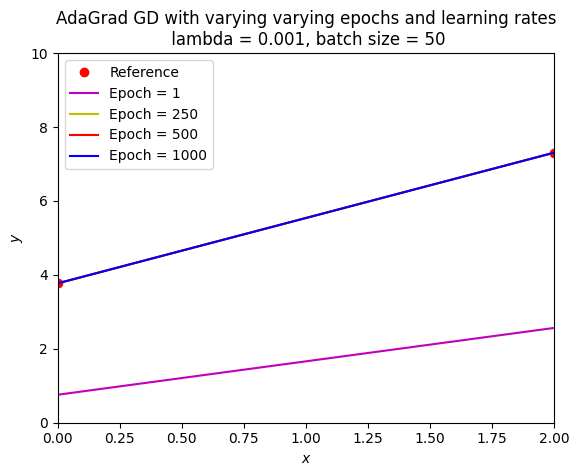

AdaGrad GD Betas: eta = 1.999608076816944e-05, lambda = 0.001, epochs = 250, batch size = 1
[[2.15629078]
 [1.83079894]]
Beta difference: 
[[-1.61677754]
 [ 0.0648486 ]]
Net diff: 1.618077551682403
AdaGrad GD Betas: eta = 0.0004975619464623346, lambda = 0.001, epochs = 250, batch size = 25
[[3.77284796]
 [1.76608345]]
Beta difference: 
[[-0.00022036]
 [ 0.00013312]]
Net diff: 0.0002574449580444723
AdaGrad GD Betas: eta = 0.0009902951079421667, lambda = 0.001, epochs = 250, batch size = 50
[[3.77257864]
 [1.76625668]]
Beta difference: 
[[-0.00048968]
 [ 0.00030635]]
Net diff: 0.0005776112098909955
AdaGrad GD Betas: eta = 0.001961553550411926, lambda = 0.001, epochs = 250, batch size = 100
[[3.77253703]
 [1.76617272]]
Beta difference: 
[[-0.00053129]
 [ 0.00022239]]
Net diff: 0.000575960130550629


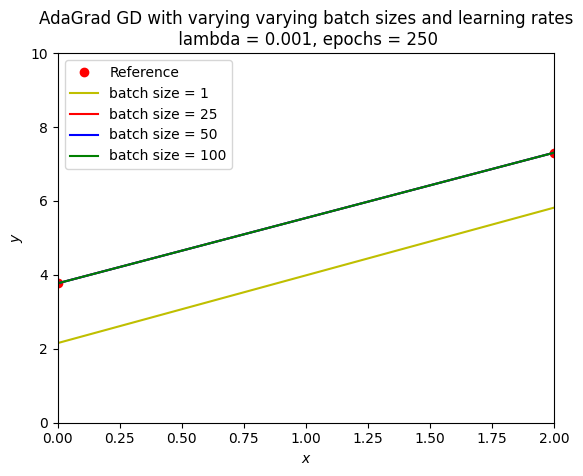

In [727]:
#Part 4, AdaGrad

linreg_ridge = OLS(X, lamb[3])
print(f"Ridge Betas: lambda={lamb[3]}\n{linreg_ridge[0]}")

#Calculating AdaGD with different epochs
ada_gd_0 = AdaGD(lamb[3], n_epochs[0], M[2], linreg_ridge)
ada_gd_1 = AdaGD(lamb[3], n_epochs[1], M[2], linreg_ridge)
ada_gd_2 = AdaGD(lamb[3], n_epochs[2], M[2], linreg_ridge)
ada_gd_3 = AdaGD(lamb[3], n_epochs[3], M[2], linreg_ridge)


plt.figure(1)
plt.title(f"AdaGrad GD with varying varying epochs and learning rates\n lambda = {lamb[3]}, batch size = {M[2]}")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.axis([0,2.0,0, 10.0])
plt.plot(xnew, linreg_ridge[1], 'ro', label=f"Reference")
plt.plot(xnew, ada_gd_0, "m", label= f"Epoch = {n_epochs[0]}")
plt.plot(xnew, ada_gd_1, "y", label= f"Epoch = {n_epochs[1]}")
plt.plot(xnew, ada_gd_2, "r", label= f"Epoch = {n_epochs[2]}")
plt.plot(xnew, ada_gd_3, 'b', label= f"Epoch = {n_epochs[3]}")
plt.legend()
plt.savefig('part4_AdaGD_epochs', dpi=300)
plt.show()

#Calculating AdaGD with different batch sizes
ada_gd_0 = AdaGD(lamb[3], n_epochs[1], M[0], linreg_ridge)
ada_gd_1 = AdaGD(lamb[3], n_epochs[1], M[1], linreg_ridge)
ada_gd_2 = AdaGD(lamb[3], n_epochs[1], M[2], linreg_ridge)
ada_gd_3 = AdaGD(lamb[3], n_epochs[1], M[3], linreg_ridge)


plt.figure(2)
plt.title(f"AdaGrad GD with varying varying batch sizes and learning rates\n lambda = {lamb[3]}, epochs = {n_epochs[1]}")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.axis([0,2.0,0, 10.0])
plt.plot(xnew, linreg_ridge[1], 'ro', label=f"Reference")
plt.plot(xnew, ada_gd_0, "y", label= f"batch size = {M[0]}")
plt.plot(xnew, ada_gd_1, "r", label= f"batch size = {M[1]}")
plt.plot(xnew, ada_gd_2, 'b',label= f"batch size = {M[2]}")
plt.plot(xnew, ada_gd_3, "g", label= f"batch size = {M[3]}")
plt.legend()
plt.savefig('part4_AdaGD_batches', dpi=300)
plt.show()

Ridge Betas: lambda=0.001
[[3.77306832]
 [1.76595034]]
AdaGrad SGD Betas: eta = 0.07246376811594203, lambda = 0.001, epochs = 1, batch size = 50
[[-0.01144126]
 [ 1.38883794]]
Beta difference: 
[[-3.78450958]
 [-0.37711239]]
Net diff: 3.80325209855263
AdaGrad SGD Betas: eta = 0.0009902951079421667, lambda = 0.001, epochs = 250, batch size = 50
[[3.77214142]
 [1.76112867]]
Beta difference: 
[[-0.0009269 ]
 [-0.00482166]]
Net diff: 0.00490994500316249
AdaGrad SGD Betas: eta = 0.0004975619464623346, lambda = 0.001, epochs = 500, batch size = 50
[[3.77949574]
 [1.7613025 ]]
Beta difference: 
[[ 0.00642741]
 [-0.00464784]]
Net diff: 0.007931836349559235
AdaGrad SGD Betas: eta = 0.0002493889969574542, lambda = 0.001, epochs = 1000, batch size = 50
[[3.7782228 ]
 [1.76059855]]
Beta difference: 
[[ 0.00515448]
 [-0.00535178]]
Net diff: 0.007430358827007629


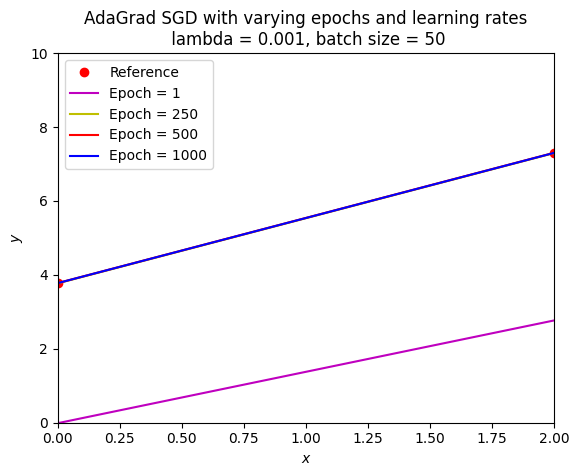

AdaGrad SGD Betas: eta = 1.999608076816944e-05, lambda = 0.001, epochs = 250, batch size = 1
[[2.58488324]
 [2.73224383]]
Beta difference: 
[[-1.18818509]
 [ 0.9662935 ]]
Net diff: 1.5315047899014627
AdaGrad SGD Betas: eta = 0.0004975619464623346, lambda = 0.001, epochs = 250, batch size = 25
[[3.76255224]
 [1.77025201]]
Beta difference: 
[[-0.01051609]
 [ 0.00430168]]
Net diff: 0.011361887560044897
AdaGrad SGD Betas: eta = 0.0009902951079421667, lambda = 0.001, epochs = 250, batch size = 50
[[3.77648052]
 [1.76504913]]
Beta difference: 
[[ 0.0034122 ]
 [-0.00090121]]
Net diff: 0.003529200720797503
AdaGrad SGD Betas: eta = 0.001961553550411926, lambda = 0.001, epochs = 250, batch size = 100
[[3.76866814]
 [1.77015723]]
Beta difference: 
[[-0.00440018]
 [ 0.0042069 ]]
Net diff: 0.00608765693920632


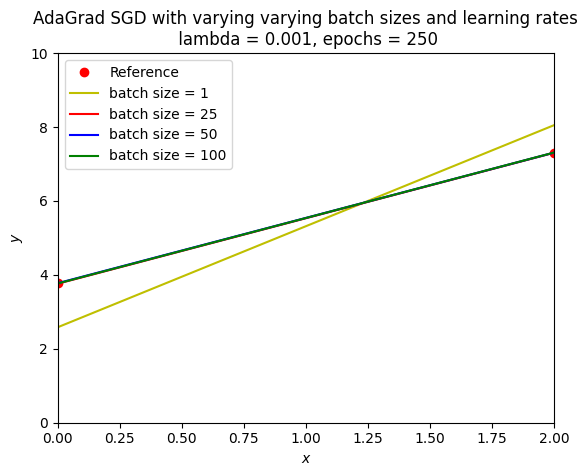

In [728]:
#Part 4, AdaGrad SGD

linreg_ridge = OLS(X, lamb[3])
print(f"Ridge Betas: lambda={lamb[3]}\n{linreg_ridge[0]}")

#Calculating AdaSGD with different parameters
ada_sgd_0 = AdaSGD(lamb[3], n_epochs[0], M[2], linreg_ridge)
ada_sgd_1 = AdaSGD(lamb[3], n_epochs[1], M[2], linreg_ridge)
ada_sgd_2 = AdaSGD(lamb[3], n_epochs[2], M[2], linreg_ridge)
ada_sgd_3 = AdaSGD(lamb[3], n_epochs[3], M[2], linreg_ridge)


plt.figure(1)
plt.title(f"AdaGrad SGD with varying epochs and learning rates\n lambda = {lamb[3]}, batch size = {M[2]}")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.axis([0,2.0,0, 10.0])
plt.plot(xnew, linreg_ridge[1], 'ro', label=f"Reference")
plt.plot(xnew, ada_sgd_0, "m", label= f"Epoch = {n_epochs[0]}")
plt.plot(xnew, ada_sgd_1, "y", label= f"Epoch = {n_epochs[1]}")
plt.plot(xnew, ada_sgd_2, "r", label= f"Epoch = {n_epochs[2]}")
plt.plot(xnew, ada_sgd_3, 'b', label= f"Epoch = {n_epochs[3]}")
plt.legend()
plt.savefig('part4_AdaSGD_epochs', dpi=300)
plt.show()

#Calculating AdaSGD with different batch sizes
ada_sgd_0 = AdaSGD(lamb[3], n_epochs[1], M[0], linreg_ridge)
ada_sgd_1 = AdaSGD(lamb[3], n_epochs[1], M[1], linreg_ridge)
ada_sgd_2 = AdaSGD(lamb[3], n_epochs[1], M[2], linreg_ridge)
ada_sgd_3 = AdaSGD(lamb[3], n_epochs[1], M[3], linreg_ridge)


plt.figure(2)
plt.title(f"AdaGrad SGD with varying varying batch sizes and learning rates\n lambda = {lamb[3]}, epochs = {n_epochs[1]}")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.axis([0,2.0,0, 10.0])
plt.plot(xnew, linreg_ridge[1], 'ro', label=f"Reference")
plt.plot(xnew, ada_sgd_0, "y", label= f"batch size = {M[0]}")
plt.plot(xnew, ada_sgd_1, "r", label= f"batch size = {M[1]}")
plt.plot(xnew, ada_sgd_2, 'b',label= f"batch size = {M[2]}")
plt.plot(xnew, ada_sgd_3, "g", label= f"batch size = {M[3]}")
plt.legend()
plt.savefig('part4_AdaSGD_batches', dpi=300)
plt.show()

Ridge Betas: lambda=0.001
[[3.77306832]
 [1.76595034]]
RMSprop Betas: eta = 0.07246376811594203, lambda = 0.001, epochs = 1, batch size = 50
[[0.07229126]
 [0.38685357]]
Beta difference: 
[[-3.70077706]
 [-1.37909676]]
Net diff: 3.9493871313808033
RMSprop Betas: eta = 0.0009902951079421667, lambda = 0.001, epochs = 250, batch size = 50
[[3.77575942]
 [1.75772542]]
Beta difference: 
[[ 0.0026911 ]
 [-0.00822492]]
Net diff: 0.00865397526722716
RMSprop Betas: eta = 0.0004975619464623346, lambda = 0.001, epochs = 500, batch size = 50
[[3.77698336]
 [1.75957488]]
Beta difference: 
[[ 0.00391503]
 [-0.00637545]]
Net diff: 0.007481571203839856
RMSprop Betas: eta = 0.0002493889969574542, lambda = 0.001, epochs = 1000, batch size = 50
[[3.77835224]
 [1.7589859 ]]
Beta difference: 
[[ 0.00528391]
 [-0.00696444]]
Net diff: 0.008742033097916485


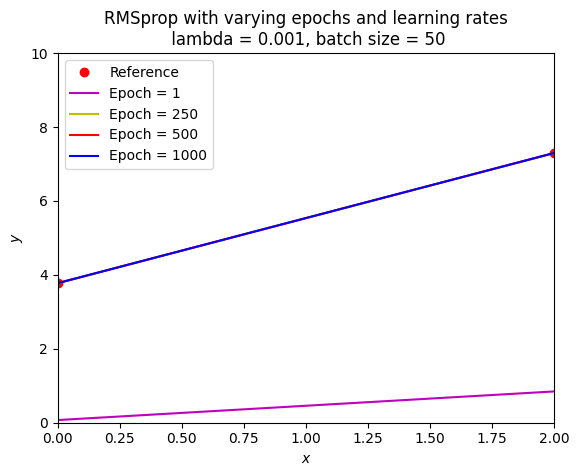

RMSprop Betas: eta = 1.999608076816944e-05, lambda = 0.001, epochs = 250, batch size = 1
[[3.39854066]
 [2.0408945 ]]
Beta difference: 
[[-0.37452766]
 [ 0.27494416]]
Net diff: 0.4646130215116089
RMSprop Betas: eta = 0.0004975619464623346, lambda = 0.001, epochs = 250, batch size = 25
[[3.76087271]
 [1.7735876 ]]
Beta difference: 
[[-0.01219561]
 [ 0.00763726]]
Net diff: 0.0143896032635129
RMSprop Betas: eta = 0.0009902951079421667, lambda = 0.001, epochs = 250, batch size = 50
[[3.77791042]
 [1.76253273]]
Beta difference: 
[[ 0.0048421 ]
 [-0.00341761]]
Net diff: 0.005926714524477639
RMSprop Betas: eta = 0.001961553550411926, lambda = 0.001, epochs = 250, batch size = 100
[[3.76495889]
 [1.77155537]]
Beta difference: 
[[-0.00810943]
 [ 0.00560504]]
Net diff: 0.009857955694258532


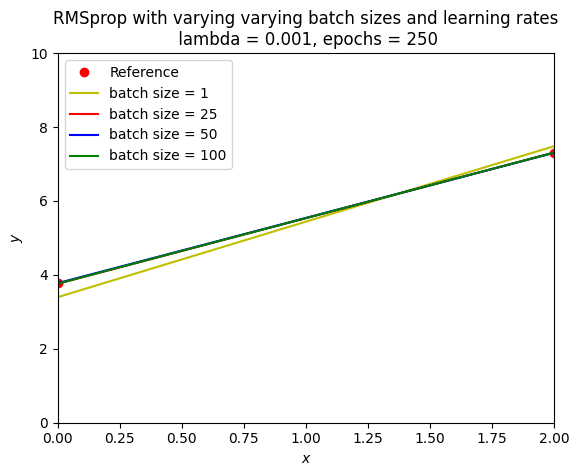

In [729]:
#Part 5, RMSprop

linreg_ridge = OLS(X, lamb[3])
print(f"Ridge Betas: lambda={lamb[3]}\n{linreg_ridge[0]}")

#Calculating RMSprop with different epochs
rms_0 = rmsprop(lamb[3], n_epochs[0], M[2], rho1, linreg_ridge)
rms_1 = rmsprop(lamb[3], n_epochs[1], M[2], rho1, linreg_ridge)
rms_2 = rmsprop(lamb[3], n_epochs[2], M[2], rho1, linreg_ridge)
rms_3 = rmsprop(lamb[3], n_epochs[3], M[2], rho1, linreg_ridge)


plt.figure(1)
plt.title(f"RMSprop with varying epochs and learning rates\n lambda = {lamb[3]}, batch size = {M[2]}")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.axis([0,2.0,0, 10.0])
plt.plot(xnew, linreg_ridge[1], 'ro', label=f"Reference")
plt.plot(xnew, rms_0, "m", label= f"Epoch = {n_epochs[0]}")
plt.plot(xnew, rms_1, "y", label= f"Epoch = {n_epochs[1]}")
plt.plot(xnew, rms_2, "r", label= f"Epoch = {n_epochs[2]}")
plt.plot(xnew, rms_3, 'b', label= f"Epoch = {n_epochs[3]}")
plt.legend()
plt.savefig('part5_rms_epochs', dpi=300)
plt.show()

#Calculating RMSprop with different batch sizes
rms_0 = rmsprop(lamb[3], n_epochs[1], M[0], rho1, linreg_ridge)
rms_1 = rmsprop(lamb[3], n_epochs[1], M[1], rho1, linreg_ridge)
rms_2 = rmsprop(lamb[3], n_epochs[1], M[2], rho1, linreg_ridge)
rms_3 = rmsprop(lamb[3], n_epochs[1], M[3], rho1, linreg_ridge)


plt.figure(2)
plt.title(f"RMSprop with varying varying batch sizes and learning rates\n lambda = {lamb[3]}, epochs = {n_epochs[1]}")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.axis([0,2.0,0, 10.0])
plt.plot(xnew, linreg_ridge[1], 'ro', label=f"Reference")
plt.plot(xnew, rms_0, "y", label= f"batch size = {M[0]}")
plt.plot(xnew, rms_1, "r", label= f"batch size = {M[1]}")
plt.plot(xnew, rms_2, 'b',label= f"batch size = {M[2]}")
plt.plot(xnew, rms_3, "g", label= f"batch size = {M[3]}")
plt.legend()
plt.savefig('part5_rms_batches', dpi=300)
plt.show()

Ridge Betas: lambda=0.001
[[3.77306832]
 [1.76595034]]
ADAM Betas: eta = 0.07246376811594203, lambda = 0.001, epochs = 1, batch size = 50
[[2.28308059]
 [2.46492407]]
Beta difference: 
[[-1.48998773]
 [ 0.69897374]]
Net diff: 1.64579091356653
ADAM Betas: eta = 0.0009902951079421667, lambda = 0.001, epochs = 250, batch size = 50
[[3.78108701]
 [1.76909923]]
Beta difference: 
[[0.00801869]
 [0.0031489 ]]
Net diff: 0.008614804870215457
ADAM Betas: eta = 0.0004975619464623346, lambda = 0.001, epochs = 500, batch size = 50
[[3.77175696]
 [1.76453122]]
Beta difference: 
[[-0.00131136]
 [-0.00141911]]
Net diff: 0.0019322405141870115
ADAM Betas: eta = 0.0002493889969574542, lambda = 0.001, epochs = 1000, batch size = 50
[[3.77220086]
 [1.76225936]]
Beta difference: 
[[-0.00086746]
 [-0.00369098]]
Net diff: 0.0037915435760856775


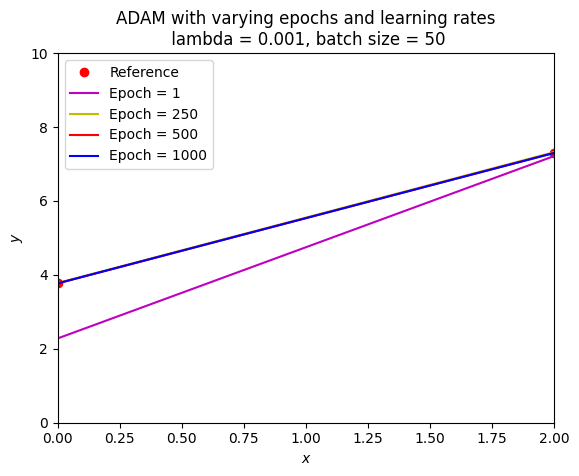

ADAM Betas: eta = 1.999608076816944e-05, lambda = 0.001, epochs = 250, batch size = 1
[[3.77201813]
 [1.76340971]]
Beta difference: 
[[-0.00105019]
 [-0.00254063]]
Net diff: 0.0027491277799414193
ADAM Betas: eta = 0.0004975619464623346, lambda = 0.001, epochs = 250, batch size = 25
[[3.76548194]
 [1.77529525]]
Beta difference: 
[[-0.00758638]
 [ 0.00934492]]
Net diff: 0.01203663684261564
ADAM Betas: eta = 0.0009902951079421667, lambda = 0.001, epochs = 250, batch size = 50
[[3.771041  ]
 [1.76589301]]
Beta difference: 
[[-2.02731956e-03]
 [-5.73237233e-05]]
Net diff: 0.0020281298348323873
ADAM Betas: eta = 0.001961553550411926, lambda = 0.001, epochs = 250, batch size = 100
[[3.76773157]
 [1.76328449]]
Beta difference: 
[[-0.00533675]
 [-0.00266584]]
Net diff: 0.005965538123994435


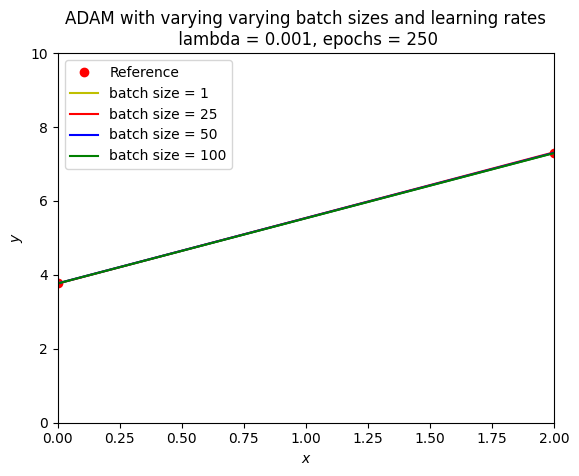

In [730]:
#Part 5, ADAM

linreg_ridge = OLS(X, lamb[3])
print(f"Ridge Betas: lambda={lamb[3]}\n{linreg_ridge[0]}")

#Calculating ADAM with different parameters
adam_0 = ADAM(lamb[3], n_epochs[0], M[2], rho1, rho2, linreg_ridge)
adam_1 = ADAM(lamb[3], n_epochs[1], M[2], rho1, rho2, linreg_ridge)
adam_2 = ADAM(lamb[3], n_epochs[2], M[2], rho1, rho2, linreg_ridge)
adam_3 = ADAM(lamb[3], n_epochs[3], M[2], rho1, rho2, linreg_ridge)


plt.figure(1)
plt.title(f"ADAM with varying epochs and learning rates\n lambda = {lamb[3]}, batch size = {M[2]}")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.axis([0,2.0,0, 10.0])
plt.plot(xnew, linreg_ridge[1], 'ro', label=f"Reference")
plt.plot(xnew, adam_0, "m", label= f"Epoch = {n_epochs[0]}")
plt.plot(xnew, adam_1, "y", label= f"Epoch = {n_epochs[1]}")
plt.plot(xnew, adam_2, "r", label= f"Epoch = {n_epochs[2]}")
plt.plot(xnew, adam_3, 'b', label= f"Epoch = {n_epochs[3]}")
plt.legend()
plt.savefig('part5_adam_epochs', dpi=300)
plt.show()

#Calculating ADAM with different parameters
adam_0 = ADAM(lamb[3], n_epochs[1], M[0], rho1, rho2, linreg_ridge)
adam_1 = ADAM(lamb[3], n_epochs[1], M[1], rho1, rho2, linreg_ridge)
adam_2 = ADAM(lamb[3], n_epochs[1], M[2], rho1, rho2, linreg_ridge)
adam_3 = ADAM(lamb[3], n_epochs[1], M[3], rho1, rho2, linreg_ridge)


plt.figure(2)
plt.title(f"ADAM with varying varying batch sizes and learning rates\n lambda = {lamb[3]}, epochs = {n_epochs[1]}")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.axis([0,2.0,0, 10.0])
plt.plot(xnew, linreg_ridge[1], 'ro', label=f"Reference")
plt.plot(xnew, adam_0, "y", label= f"batch size = {M[0]}")
plt.plot(xnew, adam_1, "r", label= f"batch size = {M[1]}")
plt.plot(xnew, adam_2, 'b',label= f"batch size = {M[2]}")
plt.plot(xnew, adam_3, "g", label= f"batch size = {M[3]}")
plt.legend()
plt.savefig('part5_adam_batches', dpi=300)
plt.show()